A little notebook to help visualise the official numbers for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

The data is dynamically loaded from: https://github.com/CSSEGISandData/COVID-19

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from jhu_helpers import *

In [3]:
jhu = aggregte_jhu_by_state(*get_jhu_data())

In [4]:
#jhu.confirmed.columns.tolist() # print a list of all countries in the data set

In [5]:
# look at recent numbers from highly affected countries
get_aggregate_top_n(jhu.confirmed)

Country/Region,China,Italy,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,United Kingdom,Netherlands,Belgium,Austria,Norway,Sweden,Portugal,Brazil,Denmark,Canada
Date,,,,,,,,,,,,,,,,,,,
2020-03-19,81156.0,41035.0,13677.0,17963.0,15320.0,18407.0,10947.0,8565.0,4075.0,2716.0,2467.0,1795.0,2013.0,1746.0,1439.0,785.0,621.0,1225.0,800.0
2020-03-20,81250.0,47021.0,19100.0,20410.0,19848.0,19644.0,12726.0,8652.0,5294.0,4014.0,3003.0,2257.0,2388.0,1914.0,1639.0,1020.0,793.0,1337.0,943.0
2020-03-21,81305.0,53578.0,25489.0,25374.0,22213.0,20610.0,14431.0,8799.0,6575.0,5067.0,3640.0,2815.0,2814.0,2118.0,1763.0,1280.0,1021.0,1420.0,1278.0
2020-03-22,81397.0,59138.0,33272.0,28768.0,24873.0,21638.0,16176.0,8897.0,7245.0,5741.0,4216.0,3401.0,3244.0,2383.0,1934.0,1600.0,1593.0,1514.0,1465.0
2020-03-23,81439.0,59138.0,33276.0,28768.0,24873.0,21638.0,16044.0,8897.0,7245.0,5741.0,4216.0,3401.0,3244.0,2383.0,1934.0,1600.0,1593.0,1514.0,1470.0


In [6]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    'Singapore',
    #'Korea, South',
    'US',
    'France',
    'Germany',
]

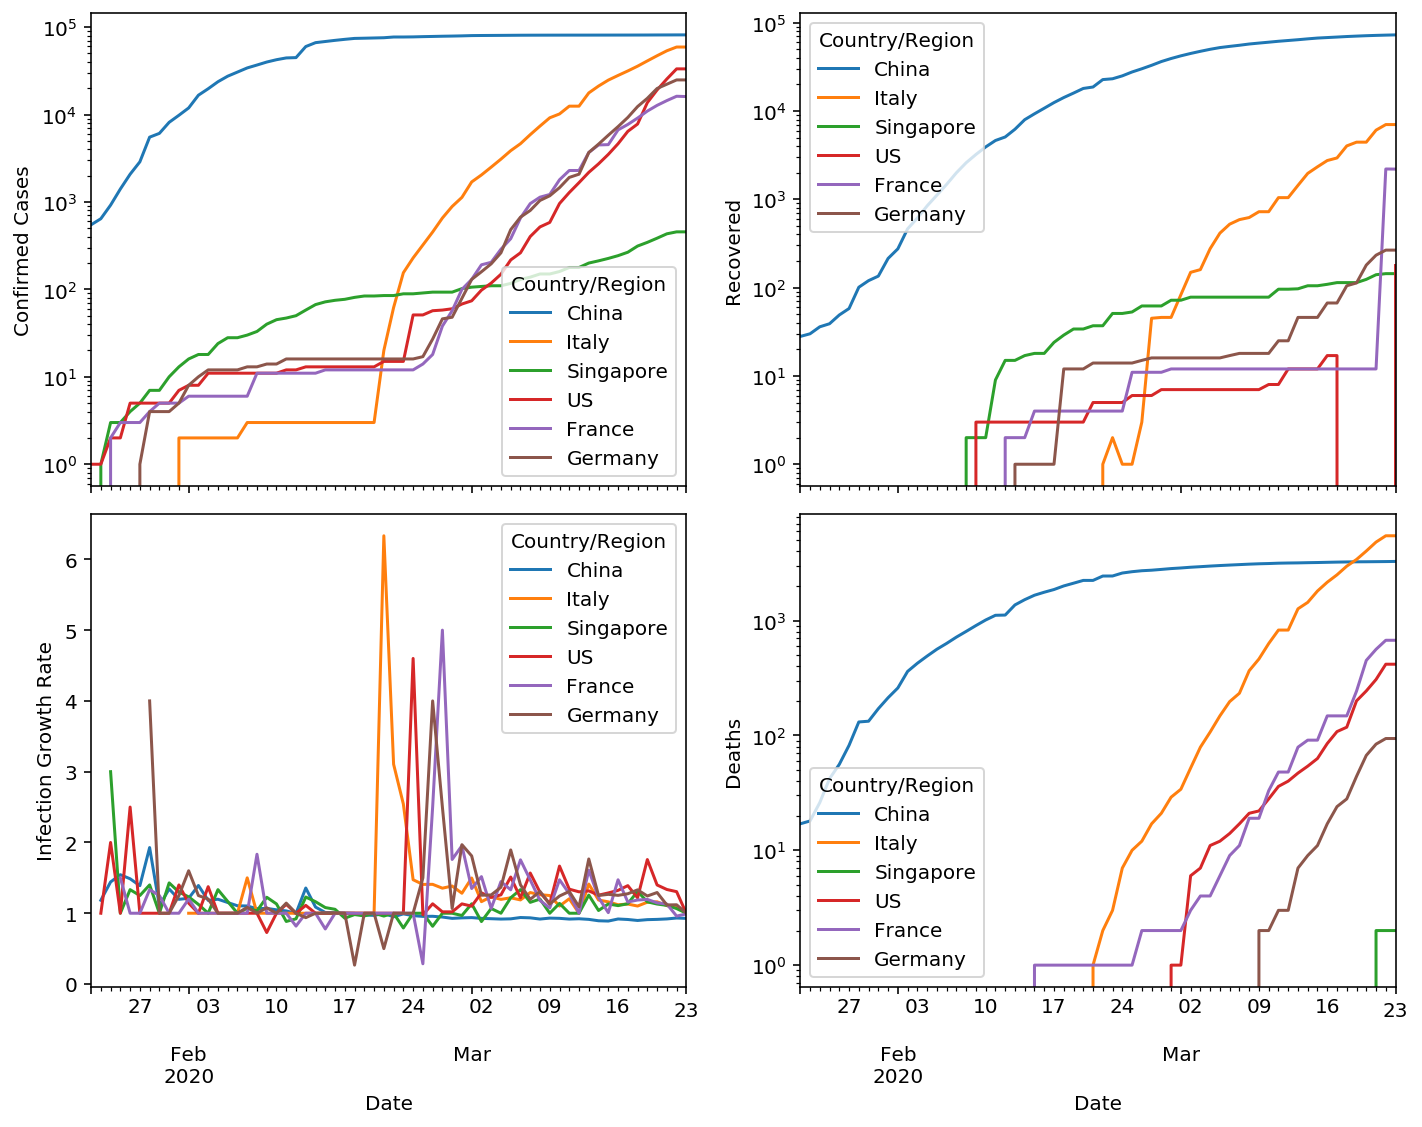

In [7]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, num=1)

jhu.confirmed[plot_countries].plot(ax=ax1[0,0], logy=True)
ax1[0,0].set_ylabel('Confirmed Cases')

smooth_rate_d = 1
jhu.infection_rate[plot_countries].rolling(smooth_rate_d, center=True, min_periods=1).mean().plot(ax=ax1[1,0], logy=False)
ax1[1,0].set_ylabel('Infection Growth Rate')

jhu.recovered[plot_countries].plot(ax=ax1[0,1], logy=True)
ax1[0,1].set_ylabel('Recovered')

jhu.deaths[plot_countries].plot(ax=ax1[1,1], logy=True)
ax1[1,1].set_ylabel('Deaths')
fig1.tight_layout()

In [8]:
# save the above figure
#fig1.savefig('sars-covid-19_timeseries.png')